<h1> Building a Binary Sampling Matrix </h1>

<h2> Data Overview </h2>

In [86]:
import xarray as xr

flom_ds = xr.open_dataset('/Users/leebardon/Desktop/stats_vs_gcm/stats_vs_gcm_data/flom_global_obs.netcdf')
flom_df = flom_ds.to_dataframe()

In [66]:
flom_df.head()

,Year,Day,Latitude,Longitude,Nitrite_Nitrate,Phosphate,Temperature,Depth,Prochlorococcus,Synechococcus,Pico_eukaryotes
unlimited,,,,,,,,,,,
0,1997.0,8.0,16.370,119.95,b'',b'',b'',0.5,b'',39770.0,b''
1,1997.0,9.0,16.348,119.93,b'',b'',b'',0.5,b'',15000.0,b''
2,1997.0,14.0,16.460,119.92,b'',b'',b'',0.5,b'',880.0,b''
3,1997.0,15.0,16.380,119.91,b'',b'',b'',0.5,b'',950.0,b''
4,1997.0,24.0,16.348,119.93,b'',b'',b'',0.5,b'',2730.0,b''


In [68]:
flom_df.count()

Year               59554
Day                59554
Latitude           59554
Longitude          59554
Nitrite_Nitrate    59554
Phosphate          59554
Temperature        59554
Depth              59554
Prochlorococcus    59554
Synechococcus      59554
Pico_eukaryotes    59554
dtype: int64

<h1> Cleaning the Data </h1> 


We immediately note that several of these columns are in a bytes-like format that we should decode, and coerce into a float datatype. Once we have processed these columns accordingly, we can proceed to examining the data in more detail. 

<h3> Decoding Bytes Objects </h3>

In [87]:
def decode_row(row):
    row = row.decode('utf-8')
    return row

cols_to_decode = [ flom_df["Phosphate"],
                   flom_df["Nitrite_Nitrate"], 
                   flom_df["Temperature"], 
                   flom_df["Prochlorococcus"], 
                   flom_df["Pico_eukaryotes"] ]
decoded_col = []

def decode_column(col): 
    for row in col:
        row = decode_row(row)
        decoded_col.append(row)
        
for col in cols_to_decode:
    decode_column(col)
    flom_df[f'{col.name}'] = decoded_col
    decoded_col.clear()
    

In [91]:
flom_df.tail()

,Year,Day,Latitude,Longitude,Nitrite_Nitrate,Phosphate,Temperature,Depth,Prochlorococcus,Synechococcus,Pico_eukaryotes
unlimited,,,,,,,,,,,
59549,1994.0,178.0,43.830556,297.180556,8.58,0.87,3.54,42.0,,9.969210e+36,4040
59550,1994.0,178.0,43.830556,297.180556,20.09,1.24,6.92,63.0,,9.969210e+36,274.9
59551,1994.0,178.0,43.830556,297.180556,,,8.38,75.0,,9.969210e+36,
59552,1994.0,178.0,43.830556,297.180556,27.32,1.25,9.8,100.0,,9.969210e+36,113900
59553,1994.0,178.0,43.830556,297.180556,38.82,1.48,10.42,200.0,,9.969210e+36,


<h3> Coercing Strings to Floats </h3>

Decoding in this way returns the data as a string type, so we have a combination of empty and non-empty strings. Here, we will convert all non-empty strings to floats, and all empty strings to the NaN datatype, where NaN represents the lack of a measurement for a given value in that time/space.  

In [92]:
import numpy as np

converted_col = []

def convert(col):
    for row in col:
        if row != "":
            row = float(row)
        else:
            row = np.nan
        converted_col.append(row)

for col in cols_to_decode:
    convert(col)
    flom_df[f'{col.name}'] = converted_col
    converted_col.clear()
    

In [94]:
flom_df.tail(5)

,Year,Day,Latitude,Longitude,Nitrite_Nitrate,Phosphate,Temperature,Depth,Prochlorococcus,Synechococcus,Pico_eukaryotes
unlimited,,,,,,,,,,,
59549,1994.0,178.0,43.830556,297.180556,8.58,0.87,3.54,42.0,NaN,9.969210e+36,4040.0
59550,1994.0,178.0,43.830556,297.180556,20.09,1.24,6.92,63.0,NaN,9.969210e+36,274.9
59551,1994.0,178.0,43.830556,297.180556,NaN,NaN,8.38,75.0,NaN,9.969210e+36,NaN
59552,1994.0,178.0,43.830556,297.180556,27.32,1.25,9.80,100.0,NaN,9.969210e+36,113900.0
59553,1994.0,178.0,43.830556,297.180556,38.82,1.48,10.42,200.0,NaN,9.969210e+36,NaN


<h1> Deeper Exploration </h1>  

In [85]:
flom_df.describe()

,Year,Day,Latitude,Longitude,Nitrite_Nitrate,Phosphate,Temperature,Depth,Prochlorococcus,Synechococcus,Pico_eukaryotes
count,5.955400e+04,5.955400e+04,5.955400e+04,5.955400e+04,38574.00000,27769.000000,50096.000000,5.955400e+04,4.228600e+04,5.955400e+04,22509.000000
mean,1.054606e+34,1.176807e+35,8.353151e+34,4.720619e+34,6.04649,0.844967,15.861593,3.232452e+35,4.162410e+04,2.389771e+36,5434.251941
std,3.240779e+35,1.076733e+36,9.087241e+35,6.843886e+35,8.53609,5.782614,9.226285,1.765804e+36,7.104746e+04,4.255987e+36,14498.577802
min,1.987000e+03,1.000000e+00,-7.805000e+01,5.982900e-01,-0.05600,-0.040000,-1.976000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.995000e+03,1.160000e+02,2.000000e+00,1.668100e+02,0.12000,0.230000,8.550000,1.800000e+01,0.000000e+00,6.460000e+02,562.874252
50%,1.999000e+03,1.950000e+02,3.300000e+01,2.358200e+02,2.59550,0.510000,16.364500,5.000000e+01,2.716000e+03,6.825300e+03,1913.200000
75%,2.003000e+03,2.940000e+02,4.341700e+01,3.004400e+02,8.26000,0.915134,24.048000,1.000000e+02,5.530600e+04,1.329210e+05,5698.000000
max,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,147.35000,367.000000,35.430000,9.969210e+36,1.820000e+06,9.969210e+36,576000.000000


We know from the above that we have ```59554``` measurements in total. However, given the values for the mean, standard deviation and max values, we can see that a number of these values seem suspcicious. 

For example, from the documentation, we know that the data were collected from 1987 to 2008, so the highest year value should be ```2.008e+03```, rather than ```9.969210e+36```. A good place to start would be to see how many rows have been given a year greater than 2008. 

In [96]:
len(flom_df[flom_df['Year'] > 2.008e+03])


63

In [98]:
print(flom_df[flom_df['Year'] > 2.008e+03])

                   Year           Day      Latitude     Longitude  \
unlimited                                                           
20102      9.969210e+36  9.969210e+36  9.969210e+36  7.866700e+00   
20103      9.969210e+36  9.969210e+36  9.969210e+36  7.866700e+00   
20104      9.969210e+36  9.969210e+36  9.969210e+36  7.866700e+00   
20105      9.969210e+36  9.969210e+36  9.969210e+36  7.866700e+00   
20106      9.969210e+36  9.969210e+36  9.969210e+36  7.866700e+00   
...                 ...           ...           ...           ...   
31049      9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36   
31050      9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36   
31051      9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36   
31052      9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36   
31053      9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36   

           Nitrite_Nitrate  Phosphate  Temperature  Depth  Prochlorococcus  \
unlimited               

We can see that 63 rows have been given the value ```9.969210e+36``` and that this persists across multiple columns. On further examination, it seems that this particular value is a default that signifies a missing value. Thus, we can go ahead and drop all rows with ```9.969210e+36``` as the year.

In [99]:
new_dataframe = flom_df.query('Year <= 2.008e+03') 
new_dataframe.describe()

,Year,Day,Latitude,Longitude,Nitrite_Nitrate,Phosphate,Temperature,Depth,Prochlorococcus,Synechococcus,Pico_eukaryotes
count,59491.000000,5.949100e+04,5.949100e+04,5.949100e+04,38511.000000,27769.000000,50096.000000,5.949100e+04,4.227800e+04,5.949100e+04,22498.000000
mean,1998.853087,1.072481e+35,7.306274e+34,3.870985e+34,6.056382,0.844967,15.861593,3.235875e+35,4.162873e+04,2.381745e+36,5435.356740
std,4.591027,1.028443e+36,8.503245e+35,6.200118e+35,8.539563,5.782614,9.226285,1.766708e+36,7.105337e+04,4.251083e+36,14501.989998
min,1987.000000,1.000000e+00,-7.805000e+01,5.982900e-01,-0.056000,-0.040000,-1.976000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1995.000000,1.160000e+02,1.998800e+00,1.668050e+02,0.120000,0.230000,8.550000,1.800000e+01,0.000000e+00,6.444697e+02,562.668563
50%,1999.000000,1.940000e+02,3.300000e+01,2.358200e+02,2.609000,0.510000,16.364500,5.000000e+01,2.712000e+03,6.800000e+03,1911.445000
75%,2003.000000,2.940000e+02,4.341700e+01,3.004400e+02,8.275000,0.915134,24.048000,1.000000e+02,5.532420e+04,1.280000e+05,5700.000000
max,2008.000000,9.969210e+36,9.969210e+36,9.969210e+36,147.350000,367.000000,35.430000,9.969210e+36,1.820000e+06,9.969210e+36,576000.000000


The years with ```9.969210e+36``` values have been removed. However, we can see that some rows with this value still remain. 

In this case, we can go ahead and remove the 63 rows that have missing year values, because we can't use those. We will leave  the  rest in place for now, as some of the columns in that row may still have some useful data. 

<b> NOTE: </b> There are also some suspicious negative values for e.g. Temperature and Phosphate. We may need to return to this later, and remove or replace as appropriate. 

In [101]:
flom_df = new_dataframe
flom_df.count()

Year               59491
Day                59491
Latitude           59491
Longitude          59491
Nitrite_Nitrate    38511
Phosphate          27769
Temperature        50096
Depth              59491
Prochlorococcus    42278
Synechococcus      59491
Pico_eukaryotes    22498
dtype: int64

<h1> Data Processing </h1>

Now that we have cleaned the data - to at least a preliminary standard - we can begin to process it accordingly. To start, we will create a measurements data including latitude, longitude and time. 

Before doing do, for the purposes of ease and comparison, we should create a function that maps the time as months, numbered from ```1 to 252```, such that Jan 1987 would be month 1 and Dec 2008 would be month 252.

In the Flombaum dataset, measurements correspond to a given day, numbered ```1 to 366``` for each year. A reasonable approach might to create a new column that maps measurements days to a unique month, such that all measurements taken in Jan 1987 will be mapped to month 1, while all measurements taken in Jan 1988 will be mapped to month 13. 

Let's remove the missing values here too:

In [102]:
new_dataframe = flom_df.query('Day <= 9.96e+30') 
new_dataframe.describe()

,Year,Day,Latitude,Longitude,Nitrite_Nitrate,Phosphate,Temperature,Depth,Prochlorococcus,Synechococcus,Pico_eukaryotes
count,58851.000000,58851.000000,5.885100e+04,5.885100e+04,38149.000000,27762.000000,49990.000000,5.885100e+04,4.211400e+04,5.885100e+04,22296.000000
mean,1998.866340,196.805917,6.606501e+33,4.573731e+33,6.111545,0.845041,15.848734,3.249043e+35,4.151586e+04,2.322609e+36,5464.843287
std,4.588139,100.554015,2.565523e+35,2.134862e+35,8.560246,5.783340,9.225855,1.770178e+36,7.106104e+04,4.214305e+36,14561.975679
min,1987.000000,1.000000,-7.805000e+01,5.982900e-01,-0.056000,-0.040000,-1.976000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1995.000000,115.000000,1.005200e+00,1.670000e+02,0.140000,0.230000,8.539250,1.800000e+01,0.000000e+00,6.291500e+02,562.575000
50%,1999.000000,193.000000,3.291300e+01,2.358200e+02,2.677117,0.510000,16.350000,5.000000e+01,2.644000e+03,6.634500e+03,1926.000000
75%,2003.000000,293.000000,4.341700e+01,3.004400e+02,8.350000,0.915846,24.016750,1.000000e+02,5.481950e+04,1.060000e+05,5745.025000
max,2008.000000,366.000000,9.969210e+36,9.969210e+36,147.350000,367.000000,35.430000,9.969210e+36,1.820000e+06,9.969210e+36,576000.000000


This confirms that ```366``` is the maximum number of days.

In [103]:
flom_df = new_dataframe

<h1> Creating a Months' Column </h1>

As mentioned in the introduction, we require a method for mapping the units of time from ```(years and days)``` to ```(months)```:

In [104]:
def assign_months(year):
    for i, row in flom_df.iterrows():
        val = flom_df.loc[i, "Year"]
        day = flom_df.loc[i, "Day"]
        if val != year:
            continue
        else:
            if  1.0 >= day < 31.0:
                flom_df.loc[i, "Month"] = months[0]
            elif 31.0 >= day < 60.0:
                flom_df.loc[i, "Month"] = months[1]
            elif 60.0 >= day < 91.0:
                flom_df.loc[i, "Month"] = months[2]
            elif 91.0 >= day < 121.0:
                flom_df.loc[i, "Month"] = months[3]
            elif 121.0 >= day < 152.0:
                flom_df.loc[i, "Month"] = months[4]
            elif 152.0 >= day < 182.0:
                flom_df.loc[i, "Month"] = months[5]
            elif 182.0 >= day < 213.0:
                flom_df.loc[i, "Month"] = months[6]
            elif 213.0 >= day < 244.0:
                flom_df.loc[i, "Month"] = months[7]
            elif 244.0 >= day < 275.0:
                flom_df.loc[i, "Month"] = months[8]
            elif 275.0 >= day < 306.0:
                flom_df.loc[i, "Month"] = months[9]
            elif 306.0 >= day < 336.0:
                flom_df.loc[i, "Month"] = months[10]
            else: 
                flom_df.loc[i, "Month"] = months[11]


The function ```assign_months()``` takes a single year as an argument, and iterates through the dataframe. Once it has detected a row with that year, it checks the day the measurement was taken, and assigns a month according to a specified range. 

<h2> Creating Years' List and Months' Vector </h2>

In [106]:
# Create list of floats for each year
import pandas as pd

years_list = []
for i in np.arange(1987.0, 2009.0, 1):
    years_list.append(i)

# Create months vector that can be updated iteratively
months = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12])

<h2> Assigning Months' based on Year and Day </h2>

In [107]:
for year in years_list:
    assign_months(year)
    months = months + 12

In [109]:
flom_df.describe()

,Year,Day,Latitude,Longitude,Nitrite_Nitrate,Phosphate,Temperature,Depth,Prochlorococcus,Synechococcus,Pico_eukaryotes,Month
count,58851.000000,58851.000000,5.885100e+04,5.885100e+04,38149.000000,27762.000000,49990.000000,5.885100e+04,4.211400e+04,5.885100e+04,22296.000000,58851.000000
mean,1998.866340,196.805917,6.606501e+33,4.573731e+33,6.111545,0.845041,15.848734,3.249043e+35,4.151586e+04,2.322609e+36,5464.843287,150.276920
std,4.588139,100.554015,2.565523e+35,2.134862e+35,8.560246,5.783340,9.225855,1.770178e+36,7.106104e+04,4.214305e+36,14561.975679,54.814934
min,1987.000000,1.000000,-7.805000e+01,5.982900e-01,-0.056000,-0.040000,-1.976000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,10.000000
25%,1995.000000,115.000000,1.005200e+00,1.670000e+02,0.140000,0.230000,8.539250,1.800000e+01,0.000000e+00,6.291500e+02,562.575000,106.000000
50%,1999.000000,193.000000,3.291300e+01,2.358200e+02,2.677117,0.510000,16.350000,5.000000e+01,2.644000e+03,6.634500e+03,1926.000000,154.000000
75%,2003.000000,293.000000,4.341700e+01,3.004400e+02,8.350000,0.915846,24.016750,1.000000e+02,5.481950e+04,1.060000e+05,5745.025000,197.000000
max,2008.000000,366.000000,9.969210e+36,9.969210e+36,147.350000,367.000000,35.430000,9.969210e+36,1.820000e+06,9.969210e+36,576000.000000,264.000000


In [111]:
flom_df.head()

,Year,Day,Latitude,Longitude,Nitrite_Nitrate,Phosphate,Temperature,Depth,Prochlorococcus,Synechococcus,Pico_eukaryotes,Month
unlimited,,,,,,,,,,,,
0,1997.0,8.0,16.370,119.95,NaN,NaN,NaN,0.5,NaN,39770.0,NaN,122.0
1,1997.0,9.0,16.348,119.93,NaN,NaN,NaN,0.5,NaN,15000.0,NaN,122.0
2,1997.0,14.0,16.460,119.92,NaN,NaN,NaN,0.5,NaN,880.0,NaN,122.0
3,1997.0,15.0,16.380,119.91,NaN,NaN,NaN,0.5,NaN,950.0,NaN,122.0
4,1997.0,24.0,16.348,119.93,NaN,NaN,NaN,0.5,NaN,2730.0,NaN,122.0


In [112]:
flom_df.tail()

,Year,Day,Latitude,Longitude,Nitrite_Nitrate,Phosphate,Temperature,Depth,Prochlorococcus,Synechococcus,Pico_eukaryotes,Month
unlimited,,,,,,,,,,,,
59549,1994.0,178.0,43.830556,297.180556,8.58,0.87,3.54,42.0,NaN,9.969210e+36,4040.0,91.0
59550,1994.0,178.0,43.830556,297.180556,20.09,1.24,6.92,63.0,NaN,9.969210e+36,274.9,91.0
59551,1994.0,178.0,43.830556,297.180556,NaN,NaN,8.38,75.0,NaN,9.969210e+36,NaN,91.0
59552,1994.0,178.0,43.830556,297.180556,27.32,1.25,9.80,100.0,NaN,9.969210e+36,113900.0,91.0
59553,1994.0,178.0,43.830556,297.180556,38.82,1.48,10.42,200.0,NaN,9.969210e+36,NaN,91.0


<h1> Matching Observations with Gridded Model </h1>

<h2> Algorithmic Overview </h2> 

<ol>

A. Read in a vector ```X```, ```Y``` and ```T``` of measurements' longitudes, latitudes, and time, respectively (all 1D vectors of size N). In this case, time, T, is in months ranging from 1 to 264. 
    

B. Read in a vector ```x``` (1D, size n_x = 144) of grid cell center longitudes, a vector ```y``` (1D, size n_y = 90) of grid cell center latitudes, and a vector ```t``` of months (1D, size n_t = 12(months)*22(years from Jan 1987 to Jan 2009)).
    
    
C. Create a 3D matrix of zeros I (size n_x, n_y, n_t) 
    

D. Create a loop where j goes from 1 to N. For each measurement j, find the 3D index (ix,iy,it) where the absolute value of x(ix) is closest to X(j), the absolute value of y(iy) is closest to Y(j), and then also let it = T(j). Set I(ix,iy,it) = 1.

</ol>


<h3> Part A </h3>

Creating a vector ```X```, ```Y``` and ```T``` of measurements' longitudes, latitudes, and time:

In [113]:
X = flom_df["Longitude"][:]
Y = flom_df["Latitude"][:]
T = flom_df["Month"][:]

print(" Measurements Lat: ", X.shape, "\n", "Measurements Lon: ",  Y.shape, "\n",  "Measurements Time: ", T.shape)

 Measurements Lat:  (58851,) 
 Measurements Lon:  (58851,) 
 Measurements Time:  (58851,)


Before we go any further, let's create a function to check whether all the rows containing the default missing value ```9.969209968386869e+36``` have been removed, as these could cause problems with the following calculations. 

In [114]:
def count_nums(series, max_value):
    total = 0
    for e in series:
        if e > max_value:
            total += 1
    print("Total out-of-bounds = ", total)

In [115]:
count_nums(X, 360)

Total out-of-bounds =  27


In [116]:
count_nums(Y, 90)

Total out-of-bounds =  39


So we have 39 values that are out of bounds for ```Y```, and 27 for ```X```. Since we want all columns ```X```, ```Y``` and ```T``` to be equal in size, we'll concatenate the three vectors into a matrix, and remove all rows where both ```X``` and ```Y``` have out-of-bounds values:

In [117]:
test_matrix = np.vstack([X,Y,T]).T
test_matrix.shape

(58851, 3)

First, let's check is Y has any values greater than 90, but less than 360. If not, then we can go ahead and remove all values greater than 360 from the matrix.

In [118]:
count_nums(Y, 360)

Total out-of-bounds =  39


Great! Moving on:

In [119]:
out_bounds = np.where(test_matrix > 360)
len(out_bounds[0])

66

This seems reasonable, as ```39 + 27 = 66```, so let's remove those:

In [121]:
cleaned_matrix = np.delete(test_matrix, out_bounds[0], axis=0)
cleaned_matrix.shape

(58812, 3)

In [122]:
X = cleaned_matrix[:, 0]
Y = cleaned_matrix[:, 1]
T = cleaned_matrix[:, 2]

In [123]:
print(" Measurements Lat: ", X.shape, "\n", 
      "Measurements Lon: ",  Y.shape, "\n",  
      "Measurements Time: ", T.shape)

 Measurements Lat:  (58812,) 
 Measurements Lon:  (58812,) 
 Measurements Time:  (58812,)


In [124]:
print("Min Lat:", X.min(), " Max Lat:", X.max(), X.shape, "\n")
print("Min Lon:", Y.min(), " Max Lon:", Y.max(), Y.shape)

Min Lat: 0.59829  Max Lat: 359.92 (58812,) 

Min Lon: -78.05  Max Lon: 81.162 (58812,)


<h3> Part B </h3>

Creating a vector ```x```, ```y``` and ```t``` of simulation grid longitudes, latitudes, and time ```(144, 90, 264)```:

In [125]:
from netCDF4 import Dataset 

grid = Dataset('grid_igsm.nc', 'r')

In [126]:
x = grid["X"][:]
y = grid["Y"][:]
t = np.arange(1, 265, 1)

In [129]:
print(x.min(), x.max())
print(y.min(), y.max())

1.25 358.75
-89.5 88.5


In [128]:
print(" Grid Lat: ", x.shape, "\n", 
      "Grid Lon: ",  y.shape, "\n",  
      "Grid Time: ", t.shape)

 Grid Lat:  (144,) 
 Grid Lon:  (90,) 
 Grid Time:  (264,)


<h3> Part C </h3>

Creating a 3D matrix of zeros ```I(nx, ny, nt)```

In [130]:
I = np.zeros(shape=(144, 90, 265))
I.shape

(144, 90, 265)

<h3> Part D </h3>

Creating a loop where j goes from ```1 to N```, and for each measurement ```j```, finding the 3D index ```(ix,iy,it)``` where the absolute value of observational data coordinate ```x(ix)``` is closest to simulation grid coordinate ```X(j)```, the absolute value of observational data coordinate ```y(iy)``` is closest to simulation grid coordinate```Y(j)```, and then letting ```it = T(j)```. Finally, setting ```I(ix,iy,it) = 1``` at the spatiotemporal location in the ```(144,90,265)``` simulation grid where observational data exists:

In [137]:
# Small scale sanity check:

for j in range(0, 1000,  100):
    ix = abs(X[j]-x).argmin()
    iy = abs(Y[j]-y).argmin()
    it = int(T[j])
    I[ix,iy,it] = 1
    
    print(ix, iy, it, "|", I[ix,iy,it], "|", I[1,2,3])
           

print("\n", "Model grid x[47] = ", x[47], "\n", "Model grid y[53] = ", y[53], "\n")
print(" x[45:49]: ", x[45:50], "\n", "y[51:55]: ", y[51:56])

47 53 122 | 1.0 | 0.0
47 53 116 | 1.0 | 0.0
133 38 198 | 1.0 | 0.0
132 48 198 | 1.0 | 0.0
129 56 199 | 1.0 | 0.0
135 66 199 | 1.0 | 0.0
135 58 202 | 1.0 | 0.0
134 37 202 | 1.0 | 0.0
123 21 203 | 1.0 | 0.0
129 26 210 | 1.0 | 0.0

 Model grid x[47] =  118.75 
 Model grid y[53] =  16.0 

 x[45:49]:  [113.75 116.25 118.75 121.25 123.75] 
 y[51:55]:  [12. 14. 16. 18. 20.]


We can see from the small scale test that we appear to be identifying the correct nearest indices for between grid cell coordinates and measurement coordinates in space. 

Now, we can perform the full computation for each measurement. We also include the month for each measurement (already calculated earlier), and, for each ix, iy and it, we change the relevant 3D index of our matrix of zeros, to a one, resulting in a binary matrix where each one represents a space and temporal coordinate where we an accompanying observational measurement. 

In [138]:
for j in range(0, 58812):
    ix = abs(X[j]-x).argmin()
    iy = abs(Y[j]-y).argmin()
    it = int(T[j])  
    I[ix,iy,it] = 1

In [139]:
mes = np.where(I > 0)
print("Total Space-Time Volume = ", 144*90*265, "\n", "Volume of Measurement Space = ", len(mes[0]))

Total Space-Time Volume =  3434400 
 Volume of Measurement Space =  4075


<h2> Creating a 3D Plot </h2>

In [140]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

pos = np.where(I==1)

def scatter3d(x, y, z):
#     for angle in range(0,360,2):
    sns.set_style("whitegrid", {'axes.grid' : False})
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
#     ax.view_init(30,angle)
    ax.grid(False)
    ax.scatter(x, y, z, facecolor=(0,0,0,0), edgecolor='crimson')
    ax.set_ylim(0, 90)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Months')
    ax.set_title("Spatiotemporal Distribution of Observational Data (1987-2008)", fontsize=15, y=1.02)
#         filename='scatter3d/angle'+str(angle)+'.png'
#         plt.savefig(filename, dpi=96)
#     plt.clf()

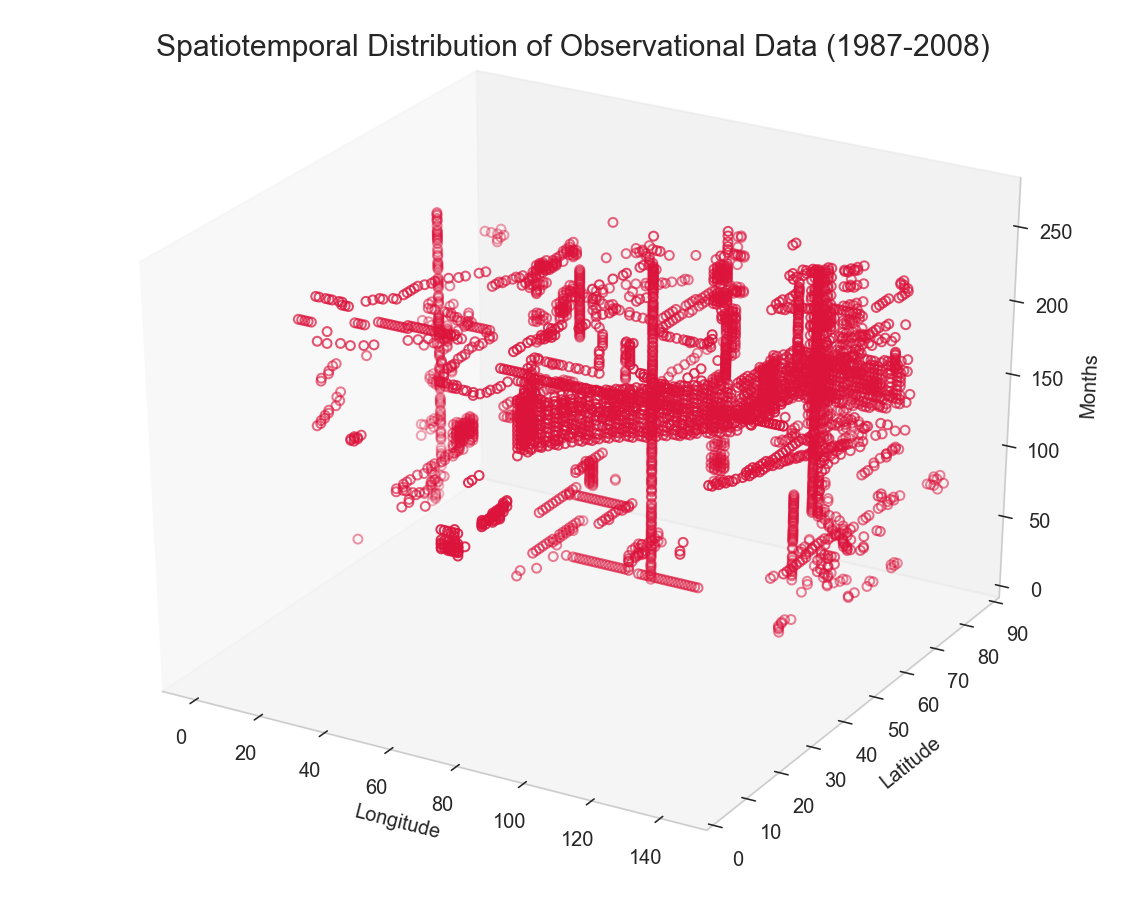

In [142]:
%matplotlib inline 
%config InlineBackend.figure_format ='retina'  # retina quality plot

scatter3d(mes[0], mes[1], mes[2])

<b>NOTE:</b> To create animation, uncomment the commented lines in the ```scatter3d``` function, ensure imagemagik is downloaded, and run the following command in the directory with the png files, via terminal:

```convert angle{0..360}.png filename.gif``` 